In [28]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
import pandas as pd 

In [29]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [30]:
df.drop(columns= ['User ID'], inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [31]:
gender_dict = {'Male' : 1, 'Female' : 0}
df['Gender'] = df['Gender'].map(gender_dict)

In [32]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:,-1].values

In [33]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [36]:
%matplotlib inline
plt.figure(figsize=(10,8))
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)


LogisticRegressionCV()

<Figure size 1000x800 with 0 Axes>

In [37]:
# def plot_decision_boundary(X, y, model):
x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
h = 0.2
x_sample = np.arange(x_min, x_max,h)
y_sample = np.arange(y_min, y_max, h)
xx, yy =np.meshgrid(np.arange(x_min, x_max,h),
                      np.arange(y_min, y_max,h))
print(f'X min: {x_min}')
print(f'X max: {x_max}')
print(f'y min: {y_min}')
print(f'y max: {y_max}')
print(f'Shape of x sample: {x_sample.shape}')
print(f'Shape of y sample: {y_sample.shape}')

X min: -2.877310557833164
X max: 3.134240875847471
y min: -2.6075056615492507
y max: 3.3567499772898386
Shape of x sample: (31,)
Shape of y sample: (30,)


In [38]:
print(f'Shape of xx : {xx.shape}')
print(f'Shape of yy : {yy.shape}')

Shape of xx : (30, 31)
Shape of yy : (30, 31)


In [39]:
xx.ravel().shape

(930,)

In [40]:
yy.ravel().shape

(930,)

In [41]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [44]:
z = z.reshape(xx.shape)

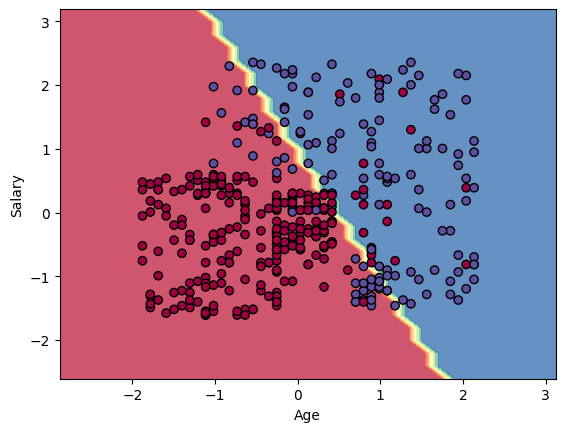

: 

In [48]:
plt.contourf(xx,yy,z, alpha = 0.8, cmap = plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c =y, edgecolors='k', cmap = plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Age')
plt.ylabel('Salary')

plt.show()